# Placement Predictor

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement-dataset.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


## Steps:
##### 1. Preprocessing + EDA + feature Selection
##### 2. Extract input and output cols
##### 3. Scale the values
##### 4. Train test split
##### 5. Train the model
##### 6.Evaluate the model/ model selection


In [4]:
df.shape

(100, 4)

In [5]:
# removing the unnamed column
df= df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
import matplotlib.pyplot as plt

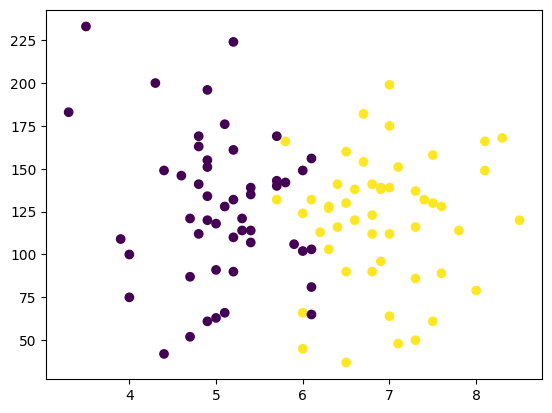

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [9]:
X= df.iloc[:,0:2]
y= df.iloc[:,-1]

In [10]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
 X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

In [14]:
X_train

,cgpa,iq
75,4.8,169.0
88,4.4,149.0
47,5.2,161.0
30,7.6,128.0
60,6.9,139.0
...,...,...
73,4.9,61.0
78,6.1,81.0
40,4.9,134.0
2,5.3,121.0


In [15]:
y_train

75    0
88    0
47    0
30    1
60    1
     ..
73    0
78    0
40    0
2     0
96    0
Name: placement, Length: 80, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_train

array([[-0.98214462,  1.07555929],
       [-1.33330247,  0.59066358],
       [-0.63098677,  0.88160101],
       [ 1.47596035,  0.08152309],
       [ 0.86143411,  0.34821573],
       [ 1.21259196, -0.9367579 ],
       [-1.06993408, -0.91251311],
       [ 0.77364465,  0.3967053 ],
       [ 1.91490767,  0.59066358],
       [ 1.30038143,  0.17850223],
       [-0.89435516,  0.63915315],
       [-0.71877623,  1.24527279],
       [-0.98214462, -0.30639348],
       [ 0.1591184 , -0.52459654],
       [ 1.38817089, -1.54287753],
       [-0.63098677,  0.17850223],
       [-0.98214462,  0.93009058],
       [ 0.51027626, -0.83977875],
       [ 0.94922357,  1.80290285],
       [ 1.21259196, -1.80957017],
       [ 0.07132894, -0.01545605],
       [ 0.33469733, -0.52459654],
       [ 0.68585518,  1.3907415 ],
       [ 0.94922357,  0.34821573],
       [ 0.51027626,  0.13001266],
       [ 1.47596035, -0.86402354],
       [ 0.42248679, -0.20941433],
       [-0.89435516,  0.7361323 ],
       [ 0.77364465,

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0.24690787, -0.28214869],
       [-0.10424999,  1.00282494],
       [-0.63098677, -0.35488305],
       [ 0.07132894, -1.4216536 ],
       [ 2.26606552, -0.11243519],
       [-1.77224979, -0.37912783],
       [ 1.65153928, -0.2579039 ],
       [ 0.77364465, -0.03970084],
       [-0.45540784, -0.2579039 ],
       [ 0.07132894,  0.59066358],
       [-0.19203945,  1.07555929],
       [-0.19203945,  0.17850223],
       [ 0.51027626, -2.12475238],
       [ 0.77364465, -0.83977875],
       [-1.06993408, -0.08819041],
       [ 0.59806572, -0.11243519],
       [ 0.42248679,  0.3967053 ],
       [ 1.38817089,  0.80886665],
       [ 1.82711821, -1.10647139],
       [ 0.1591184 ,  0.76037708]])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()

In [24]:
#model traning
clf.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred = clf.predict(X_test)

In [26]:
y_test

99    1
85    1
92    0
45    1
69    1
31    0
55    1
0     1
41    0
33    0
84    0
87    1
82    1
35    1
24    0
20    1
54    1
91    1
58    1
8     0
Name: placement, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

0.8

In [29]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

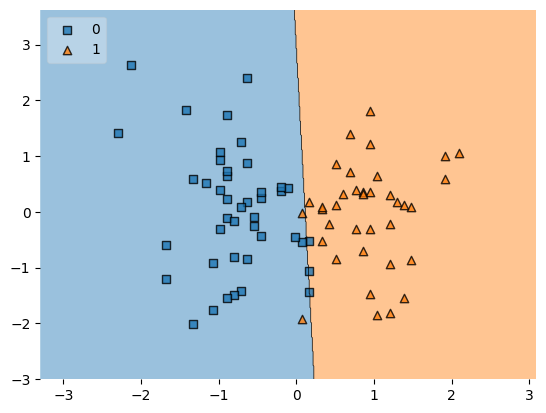

In [30]:
plot_decision_regions(X_train, y_train.values, clf = clf, legend=2)

In [31]:
import pickle 

In [32]:
pickle.dump(clf,open('model.pkl','wb'))

### ### Finish ### ###